In [1]:
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary
from torch.utils.data import Dataset,DataLoader
from PIL import Image
import matplotlib.pyplot as plt



In [2]:
import os
import pandas as pd
import numpy as np

class myDataset(Dataset):
    """Return : label, PILImages, target"""
    def __init__(self,image_folder_path:str,classes:list,transform = None,random_seed = None):
        self.classes = classes
        self.key = {c : i+1 for i,c in enumerate(self.classes)} # i+1 : gaussian label = [1.,0.,0...,0]
        self.class_pathes = [os.path.join(image_folder_path,cla)for cla in classes] # root/cats , root/dogs
        self.df = pd.DataFrame([[i+1,os.path.join(cla,file)] for i,cla in enumerate(self.class_pathes) for file in os.listdir(cla)]) #0~4000 # 
        self.files_test = [os.listdir(os.path.join(self.class_pathes, i)) for i in self.classes] 

        self.label = self.df.iloc[:,0]
        self.files = self.df.iloc[:,1]
        self.transform = transform
        self.random_seed = random_seed
        
    def __getitem__(self, index: int):
        if self.random_seed:
            np.random.seed(self.random_seed)
            index = np.random.randint(0,len(self.df)-1)
        label = self.df.iloc[index,0]
        image_value = Image.open(self.df.iloc[index,1])
        target = torch.zeros(len(self.classes)+1)
        target[label] = 1
        
        if self.transform:
            image_value = self.transform(image_value)
        
        return label,image_value,target
         
    def __len__(self):
        return len(self.df)
    
    def plot_image(self,index):
        image = (np.array(Image.open(self.files[index])))/255.
        plt.title('label : '+str(self.label[index]))
        plt.imshow(image)
                

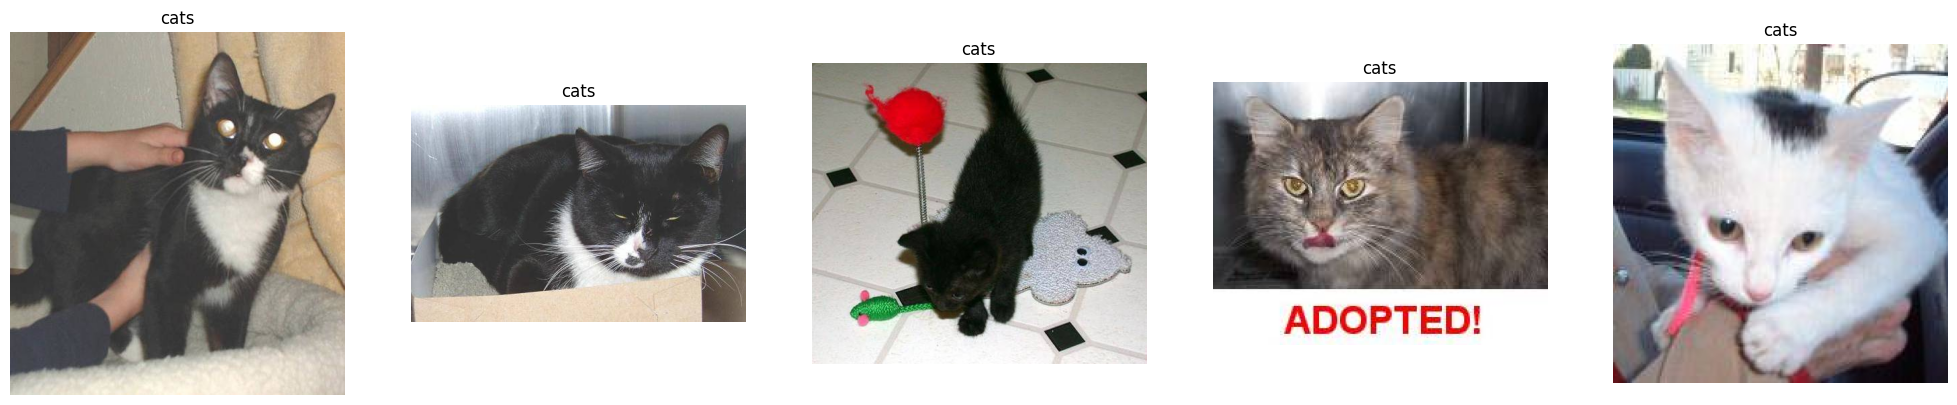

In [6]:

path = './data/test'
classes = ['cats','raccoons']
dataset_test = myDataset(path,classes,)
fig, axs = plt.subplots(1, 5, figsize=(25, 5), squeeze=False)
for i,data in enumerate(dataset_test):
    label,image_tensor,target_tenso = data
    if i > 4:break  
    axs[0,i].set_title(str(classes[label-1]))
    axs[0,i].imshow(image_tensor)
    axs[0,i].axis('off')
plt.show()
      

In [6]:
def tran(classes):
    for i,_ in classes:
        
        one = torch.zeros()
    
labels = torch.tensor([1, 2, 3, 5])
one_hot = torch.zeros(4, 6)
one_hot[torch.arange(4), labels] = 1
one_hot

tensor([[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [221]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = tf.keras.layers.Softmax()(tf.Variable(a,dtype=tf.float32))
print(y_pred)
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce(y_true, y_pred).numpy()

tf.Tensor(
[[0.22487354 0.27466115 0.5004653 ]
 [0.31559783 0.42601252 0.25838965]], shape=(2, 3), dtype=float32)


1.3227518

In [220]:
y_true = torch.Tensor([1,2]).long()
y_pred = nn.Softmax(dim=-1)(torch.tensor(a,dtype=torch.float32))
print(y_pred)
nn.CrossEntropyLoss()(y_pred, y_true).numpy()#.squeeze(dim=-1))


tensor([[0.2249, 0.2747, 0.5005],
        [0.3156, 0.4260, 0.2584]])


array(1.1703165, dtype=float32)

In [219]:
y_p = torch.tensor(a,dtype=torch.float32)
nn.CrossEntropyLoss()(y_p, y_true).numpy()#.squeeze(dim=-1))


array(1.3227518, dtype=float32)

In [224]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = (tf.Variable(a,dtype=tf.float32))
print(y_pred)
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce(y_true, y_pred).numpy()

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0. , 0.2, 0.8],
       [0.3, 0.6, 0.1]], dtype=float32)>


1.9560115

In [4]:
class OCCNN(nn.Module):


    def __init__(self,loss = nn.CrossEntropyLoss(),input_shape=(224,224,3)):
        super(OCCNN,self).__init__()
        self.loss_function = loss
        self.input_shape = input_shape
        vgg = models.vgg16(pretrained=True)
        for param in vgg.parameters():
            param.requires_grad = False
        vgg.classifier = nn.Sequential(vgg.classifier[:-5])
        self.model = vgg
        
    def forward(self,x):
        return self.model(x)
    
        
        loss = self.loss_function()
        
class Classifier(nn.Module):
    
    
    def __init__(self,num_feature=3): # 2 label, 1 gaussina label
        self.num_feature = num_feature
        super(Classifier,self).__init__()
        self.layers = nn.Sequential(nn.Linear(in_features=4096,out_features=512),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(512,128),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(128,self.num_feature),
                                    #    nn.Softmax(dim=0) # loss function : nn.CrossEntropyLoss()
                                       )
        
    def forward(self,x):
        return self.layers(x)
        

In [13]:
a = np.array([10])
a.to

In [7]:
from torchvision import transforms

In [11]:
path = '../../data'
classes = ['cat','raccoon']
trans = transforms.Compose([transforms.Resize((224,224)), # PIL Image
                            transforms.ToTensor()])       # tensor

dataset_test = myDataset(path,classes,transform=trans,random_seed=64)
# dataset_test.plot_image(42)
l,sample,t = next(iter(dataset_test))
np.shape(sample)
l

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './data\\cat'

In [13]:
# dataset
# transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

train_dataset = myDataset('./data/test',class_list,transform)
td = Subset(train_dataset,np.arange(500))
# test_dataset = myDataset('./data/test',['cats','dogs','raccoons'],transform)
train_dataloder = DataLoader(td,batch_size=32,num_workers=0,shuffle=True)
# test_dataloder = DataLoadbat_size=32,num_workers=0)


# network train
model = OCCNN()
classifier = Classifier(num_feature=num_feature)
inm  = nn.InstanceNorm1d(1, affine=False)

if torch.cuda.is_available():
    # GPU available
    device = torch.device("cuda:0")
    model.cuda()
    classifier.cuda()

model.train()
classifier.train()

classifier_optimiser = torch.optim.Adam(classifier.parameters(),lr=1e-4)
cross_entropy_criterion = nn.CrossEntropyLoss()

counter = 0
progress_loss = []
progress_acc = []

for i in range(40):
    for label,x_train,target in train_dataloder:
        counter +=1
        bat_size = len(label)

        # labels = np.concatenate((np.zeros((bat_size,)),label.numpy()),axis=0) # [fake, input]
        labels = np.concatenate((np.zeros((bat_size,)),np.ones((bat_size,))),axis=0) # [fake, input]
        
        labels = torch.from_numpy(labels)       
        labels = torch.autograd.Variable(labels.cuda()).long()

        gaussian_data = np.random.normal(0,0.1,(bat_size,4096))
        gaussian_data = torch.from_numpy(gaussian_data)
        

        x_train.requiers_grad = True
        out1 = model(x_train.to(device))
        out1 = out1.view(out1.size(), 1, 4096)
        out1 = inm(out1)
        out1 = out1.view(out1.size(), 4096)

        out2 = gaussian_data.float().to(device)
        out2.requires_grad = True
        out = torch.cat((out2,out1),0)
        out = classifier(out)         

        
        classifier_optimiser.zero_grad()
  
        loss = cross_entropy_criterion(out,labels) 
        loss.backward()
        
        classifier_optimiser.step() # train only clf
        
        running_acc = accuracy(nn.functional.softmax(out,dim=-1),labels,top_k=2)
        
        if counter % 5 == 0:
            progress_loss.append(loss.item())
            progress_acc.append(running_acc.item())
            print(f'counter={counter} loss : {loss}, acc : {running_acc}')
        break
    print(f'epoch : {i} done.')        
print('done.')

True

In [12]:
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

train_dataset = myDataset('./train',['cats','dogs'],transform)
test_dataset = myDataset('./test',['cats','dogs','raccoons'],transform)
train_dataloder = DataLoader(train_dataset,batch_size=32,num_workers=0)
test_dataloder = DataLoader(test_dataset,batch_size=32,num_workers=0)

label,data,oh =next(iter(train_dataloder))
data.size()


1/32
0.2 0.8
0    1
2/32




FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './train\\cats'

In [70]:
oc = OCCNN()
clf = classifier(num_feature=3)
model = nn.Sequential(oc,clf 
                      )
x = model(data)
x


tensor([[-0.0567, -0.0471, -0.0479],
        [-0.0207, -0.2206, -0.0200],
        [ 0.0111, -0.1359, -0.1326],
        [-0.1590, -0.0678, -0.1040],
        [-0.1092, -0.0978, -0.0532],
        [ 0.0519, -0.1901, -0.1224],
        [-0.0635, -0.1778, -0.1059],
        [-0.0933, -0.0906, -0.0992],
        [-0.1089, -0.1345, -0.0697],
        [-0.0346, -0.1038, -0.0901],
        [-0.0380, -0.2303, -0.0999],
        [-0.0284, -0.1057, -0.1010],
        [-0.0799, -0.1884, -0.0256],
        [-0.0502, -0.1499, -0.1396],
        [-0.0807, -0.0497, -0.0835],
        [-0.0151, -0.1415, -0.1538],
        [-0.0251, -0.0558, -0.0176],
        [-0.0403, -0.0290, -0.0673],
        [-0.0305, -0.0919, -0.0879],
        [-0.0133, -0.1229, -0.1910],
        [-0.0422, -0.1365, -0.0668],
        [-0.0053, -0.1157, -0.1410],
        [-0.0875, -0.0789, -0.0756],
        [-0.0591, -0.1296, -0.0906],
        [-0.0716, -0.1465, -0.0865],
        [-0.1506, -0.1088, -0.1167],
        [-0.0131, -0.1002, -0.0687],
 

In [71]:
classifier = classifier()

In [18]:
# dataset
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

train_dataset = myDataset('./data/train',['cats','dogs'],transform)
test_dataset = myDataset('./data/test',['cats','dogs','raccoons'],transform)
train_dataloder = DataLoader(train_dataset,batch_size=32,num_workers=0)
test_dataloder = DataLoader(test_dataset,batch_size=32,num_workers=0)


# network train
model = OCCNN()
classifier = Classifier(num_feature=3)

if torch.cuda.is_available():
    # GPU available
    device = torch.device("cuda:0")
    model.cuda()
    classifier.cuda()
    pass

classifier.train()

classifier_optimiser = torch.optim.Adam(model.parameters(),lr=1e-4)
cross_entropy_criterion = nn.CrossEntropyLoss()

counter = 0
progress = []

for i in range(2):
    for label,x_train,target in train_dataloder:
        
        labels = np.concatenate((np.zeros((train_dataloder.batch_size,)),label.numpy()),axis=0)
        labels = torch.from_numpy(labels).long().to(device)
        
        gaussian_data = np.random.normal(0,0.1,(train_dataloder.batch_size,4096))
        gaussian_data = torch.from_numpy(gaussian_data)
        
        out1 = model(x_train.to(device))
        out2 = gaussian_data.float().to(device)
        out = torch.cat((out1,out2),0)
        out = classifier(out)
  
        classifier_optimiser.zero_grad()
  
        loss = cross_entropy_criterion(out,labels) 
        loss.backward()
        
        classifier_optimiser.step() # train only clf

        
        if counter % 5 == 0:
            progress.append(loss.item())
            print('counter = ',counter)
        break
    print('epoch : {i} done.')        
    break    




counter =  0
epoch : {i} done.


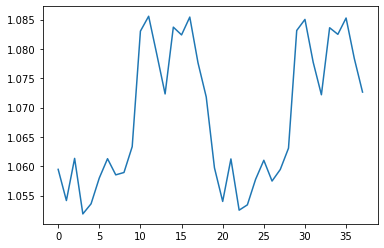

In [76]:
plt.plot(progress)
plt.show()

In [90]:
df = test_dataset.df
df[df.iloc[:,0]==3].head()


,0,1
2000,3,./test\raccoons\raccoon-100_jpg.rf.YWIftfgUdZq...
2001,3,./test\raccoons\raccoon-101_jpg.rf.ebfr15yC06H...
2002,3,./test\raccoons\raccoon-102_jpg.rf.Vtizg4N4D1W...
2003,3,./test\raccoons\raccoon-103_jpg.rf.yx4ScGFA2FZ...
2004,3,./test\raccoons\raccoon-104_jpg.rf.HdpZVmq1teO...


In [107]:
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [92]:
images = Image.open(df.iloc[0,1])
images.show()

In [109]:
summary(classifier,(4096,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       2,097,664
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 128]          65,664
              ReLU-4                  [-1, 128]               0
            Linear-5                    [-1, 3]             387
Total params: 2,163,715
Trainable params: 2,163,715
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.01
Params size (MB): 8.25
Estimated Total Size (MB): 8.28
----------------------------------------------------------------


In [112]:
s = sample.numpy()
s = s.reshape((1,3,224,224))

In [117]:
samples = next(iter(test_dataloder))
samples

[tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
 tensor([[[[0.5451, 0.5412, 0.5569,  ..., 0.8431, 0.8392, 0.8431],
           [0.5412, 0.5451, 0.5490,  ..., 0.8510, 0.8510, 0.8510],
           [0.5490, 0.5490, 0.5373,  ..., 0.8510, 0.8471, 0.8431],
           ...,
           [0.7451, 0.7647, 0.8000,  ..., 0.8196, 0.8275, 0.8039],
           [0.7804, 0.7961, 0.8157,  ..., 0.8078, 0.8078, 0.7882],
           [0.8078, 0.8157, 0.8235,  ..., 0.8000, 0.7882, 0.7686]],
 
          [[0.5255, 0.5216, 0.5373,  ..., 0.7137, 0.7098, 0.7176],
           [0.5216, 0.5255, 0.5294,  ..., 0.7216, 0.7216, 0.7216],
           [0.5294, 0.5294, 0.5176,  ..., 0.7216, 0.7176, 0.7137],
           ...,
           [0.7451, 0.7647, 0.8000,  ..., 0.7804, 0.7882, 0.7647],
           [0.7843, 0.8000, 0.8157,  ..., 0.7686, 0.7686, 0.7490],
           [0.8118, 0.8196, 0.8275,  ..., 0.7647, 0.7529, 0.7333]],
 
          [[0.4510, 0.4471, 0.4627,  ..., 

In [123]:
classifier.eval()
output = model(samples[1]) # transform(images)
output = classifier(output)
nn.Softmax(dim=-1)(output)

tensor([[0.3712, 0.3236, 0.3052],
        [0.3584, 0.3426, 0.2989],
        [0.3552, 0.3075, 0.3373],
        [0.3811, 0.3190, 0.2998],
        [0.3802, 0.3108, 0.3090],
        [0.3733, 0.3263, 0.3004],
        [0.3686, 0.3152, 0.3162],
        [0.3836, 0.3132, 0.3032],
        [0.3768, 0.3227, 0.3005],
        [0.3801, 0.3149, 0.3049],
        [0.3481, 0.3328, 0.3191],
        [0.3707, 0.3324, 0.2969],
        [0.3626, 0.3429, 0.2946],
        [0.3684, 0.3368, 0.2948],
        [0.3854, 0.3263, 0.2883],
        [0.3801, 0.3362, 0.2837],
        [0.3676, 0.3157, 0.3167],
        [0.3763, 0.3197, 0.3040],
        [0.3902, 0.3151, 0.2947],
        [0.3917, 0.3196, 0.2887],
        [0.3663, 0.3253, 0.3083],
        [0.3427, 0.3335, 0.3239],
        [0.3690, 0.3326, 0.2984],
        [0.4012, 0.3175, 0.2813],
        [0.3667, 0.3240, 0.3093],
        [0.3721, 0.3276, 0.3002],
        [0.3534, 0.3272, 0.3194],
        [0.3751, 0.3356, 0.2893],
        [0.3668, 0.3200, 0.3131],
        [0.341

In [3]:
net = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\201721360/.cache\torch\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:49<00:00, 11.3MB/s] 


In [13]:
summary(net,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [18]:
new_classifier = nn.Sequential(*list(net.classifier.children())[:-3])
print(new_classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
)


In [21]:
net.classifier = net.classifier[:-1]
net.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
)